In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("/content/decision-tree.csv")
data = data.fillna(0)
data.shape

(768, 9)

In [3]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=41)

In [4]:
X.shape

(768, 8)

In [5]:
y.shape

(768, 1)

In [6]:
import warnings
warnings.filterwarnings("ignore")


In [7]:
import numpy as np
from collections import Counter

class DecisionTreeID3:
    def __init__(self, max_depth=None, min_samples_split=10):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        num_samples, num_features = X.shape

        # Stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or num_samples < self.min_samples_split:
            return self._most_common_label(y)

        if len(np.unique(y)) == 1:
            return y[0]

        # Calculate Information Gain for all features
        information_gains = []
        for feature_idx in range(num_features):
            information_gain = self._calculate_information_gain(X, y, feature_idx)
            information_gains.append(information_gain)

        # Select the feature with the highest Information Gain
        best_feature_idx = np.argmax(information_gains)

        # Create a decision tree node
        tree_node = {'feature_idx': best_feature_idx, 'children': {}}

        # Split the data based on the best feature
        unique_values = np.unique(X[:, best_feature_idx])
        for value in unique_values:
            value_mask = X[:, best_feature_idx] == value
            X_subset, y_subset = X[value_mask], y[value_mask]

            # Recursively build the subtree
            tree_node['children'][value] = self._build_tree(X_subset, y_subset, depth + 1)

        return tree_node

    def _calculate_entropy(self, y):
        y_1d = y.flatten()
        class_counts = Counter(y_1d)
        class_probabilities = [count / len(y) for count in class_counts.values()]
        entropy = -np.sum(p * np.log2(p + 1e-6) for p in class_probabilities)
        return entropy

    def _calculate_information_gain(self, X, y, feature_idx):
        parent_entropy = self._calculate_entropy(y)
        unique_values = np.unique(X[:, feature_idx])

        weighted_child_entropy = 0.0
        for value in unique_values:
            value_mask = X[:, feature_idx] == value
            y_subset = y[value_mask]
            weight = len(y_subset) / len(y)
            weighted_child_entropy += weight * self._calculate_entropy(y_subset)

        information_gain = parent_entropy - weighted_child_entropy
        return information_gain

    def _most_common_label(self, y):
        y_1d = y.flatten()
        class_counts = Counter(y_1d)
        most_common_label = class_counts.most_common(1)[0][0]
        return most_common_label

    def predict(self, X):
        return [self._predict_tree(x, self.tree) for x in X]

    def _predict_tree(self, x, node):
        if isinstance(node, dict) and 'feature_idx' in node:
            feature_idx = node['feature_idx']
            value = x[feature_idx]
            if value in node['children']:
                return self._predict_tree(x, node['children'][value])
            else:
                # If the value is not in the training data, return the most common label at this node
                return self._most_common_label(list(node['children'].values())[0])
        else:
            return node

    def print_tree(self, node, depth=0):
        if isinstance(node, dict) and 'feature_idx' in node:
            feature_idx = node['feature_idx']
            print("  " * depth, f"Feature {feature_idx}:")
            for value, child_node in node['children'].items():
                print("  " * (depth + 1), f"Value {value}:")
                self.print_tree(child_node, depth + 2)
        else:
            print("  " * depth, f"Class {node}")

    def prune(self, node, X_val, y_val):
        if isinstance(node, dict) and 'feature_idx' in node and node['children'] is not None:
            # Initialize a list to store child nodes that will be pruned
            nodes_to_prune = []

            # Recursively mark child nodes for pruning
            for value, child_node in node['children'].items():
                if (
                    isinstance(child_node, dict) and
                    'feature_idx' in child_node and
                    child_node['feature_idx'] is not None and  # Ensure 'feature_idx' is not None
                    'children' in child_node and
                    isinstance(child_node['children'], dict)  # Ensure 'children' is a dictionary
                ):
                    self.prune(child_node, X_val, y_val)

                    # Check if the child node should be pruned
                    if child_node['feature_idx'] is None:
                        nodes_to_prune.append(value)

            # Prune the marked child nodes
            for value in nodes_to_prune:
                del node['children'][value]


In [8]:
tree = DecisionTreeID3(min_samples_split=10)
tree.fit(X_train, y_train)

# Make predictions on a new dataset (X_test)
y_pred = tree.predict(X_test)


In [9]:
y_pred

[0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1]

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5454545454545454

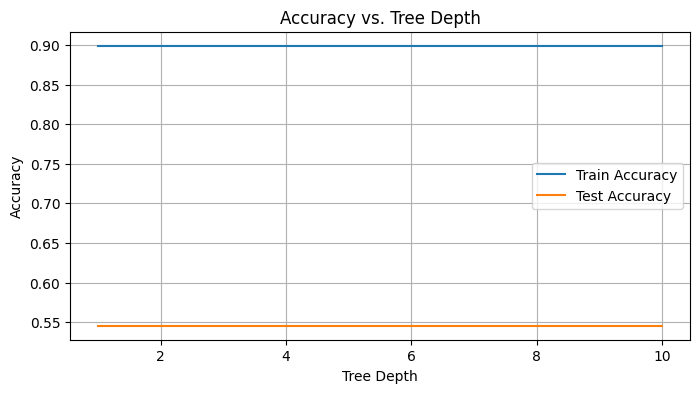

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split your dataset into training, validation, and test sets

# Initialize lists to store accuracy values
train_acc = []
test_acc = []

# Initialize a list to store pruned trees
pruned_trees = []

depths = range(1, 11)

for depth in depths:
    # Train a custom DecisionTreeID3
    tree = DecisionTreeID3(max_depth=depth, min_samples_split=10)
    tree.fit(X_train, y_train)

    # Evaluate on the training set
    y_train_pred = tree.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc.append(train_accuracy)

    # Evaluate on the test set (using y_test)
    y_test_pred = tree.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_acc.append(test_accuracy)

    pruned_trees.append(tree)  # Store the tree for potential pruning

# Plot accuracy vs. depth
plt.figure(figsize=(8, 4))
plt.plot(depths, train_acc, label='Train Accuracy')
plt.plot(depths, test_acc, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Tree Depth')
plt.grid(True)
plt.show()


best_depth = depths[np.argmax(test_acc)]

pruned_tree = pruned_trees[best_depth - 1]  # Trees are 0-indexed



In [13]:
pruned_tree = DecisionTreeID3(max_depth=best_depth, min_samples_split=10)
pruned_tree.fit(X_train, y_train)


In [14]:
pruned_tree.prune(pruned_tree.tree, X_test, y_test)

In [15]:
pruned_tree.print_tree(pruned_tree.tree)

 Feature 6:
   Value 0.078:
     Class 0
   Value 0.084:
     Class 0
   Value 0.085:
     Class 0
   Value 0.088:
     Class 1
   Value 0.089:
     Class 0
   Value 0.092:
     Class 0
   Value 0.096:
     Class 0
   Value 0.1:
     Class 0
   Value 0.101:
     Class 0
   Value 0.102:
     Class 0
   Value 0.107:
     Class 0
   Value 0.108:
     Class 0
   Value 0.115:
     Class 0
   Value 0.118:
     Class 0
   Value 0.121:
     Class 0
   Value 0.122:
     Class 0
   Value 0.126:
     Class 0
   Value 0.127:
     Class 1
   Value 0.128:
     Class 1
   Value 0.13:
     Class 0
   Value 0.133:
     Class 0
   Value 0.134:
     Class 0
   Value 0.136:
     Class 0
   Value 0.137:
     Class 0
   Value 0.14:
     Class 0
   Value 0.141:
     Class 1
   Value 0.142:
     Class 0
   Value 0.143:
     Class 0
   Value 0.144:
     Class 0
   Value 0.145:
     Class 0
   Value 0.147:
     Class 0
   Value 0.148:
     Class 0
   Value 0.15:
     Class 1
   Value 0.151:
     Class 0
   Valu

In [16]:
from sklearn.metrics import accuracy_score
macro_accuracy = accuracy_score(y_test, y_pred)
macro_accuracy

0.5454545454545454

In [17]:
from sklearn.metrics import precision_score
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_precision

0.41819772528433946

In [18]:
from sklearn.metrics import recall_score
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_recall

0.4484848484848485